In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
sentiment_dataset = pd.read_csv("Sentiment140_filtered.csv")

In [55]:
sentiment_dataset.head()

,Unnamed: 0,target,ids,date,flag,user,text,hate_pred
0,750,0,1467998601,Mon Apr 06 23:11:18 PDT 2009,NO_QUERY,Young_J,I'm off too bed. I gotta wake up hella early t...,1
1,766711,0,2300049112,Tue Jun 23 13:40:12 PDT 2009,NO_QUERY,dougnawoschik,I havent been able to listen to it yet My spe...,1
2,285055,0,1993474319,Mon Jun 01 10:26:09 PDT 2009,NO_QUERY,thireven,now remembers why solving a relatively big equ...,1
3,705995,0,2256551006,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,taracollins086,"Ate too much, feel sick",1
4,379611,0,2052381070,Sat Jun 06 00:32:23 PDT 2009,NO_QUERY,Portablemonkey,Tried to purchase a parked domain through GoDa...,1


In [56]:
sentiment_dataset.isnull().sum()

Unnamed: 0    0
target        0
ids           0
date          0
flag          0
user          0
text          0
hate_pred     0
dtype: int64

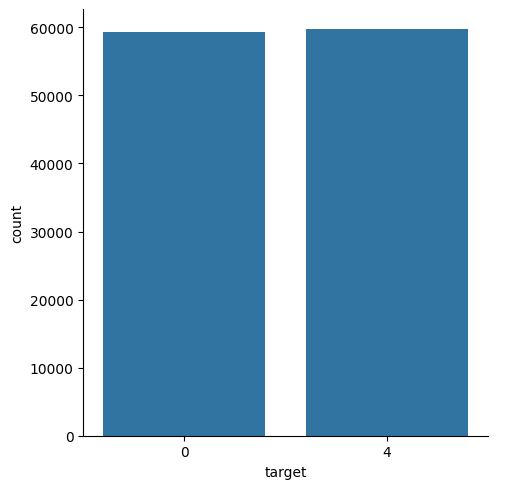

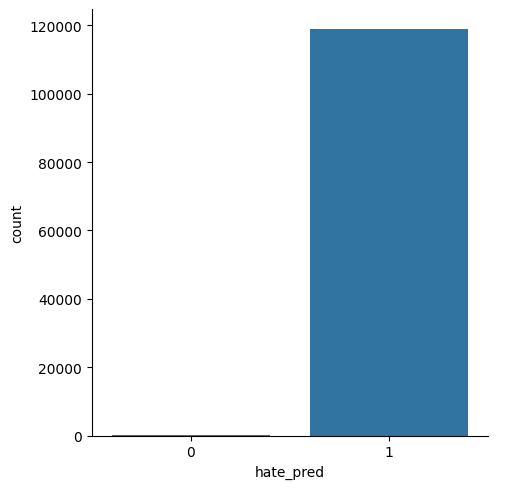

In [57]:
sns.catplot(x = 'target', data = sentiment_dataset, kind = 'count')

sns.catplot(x = 'hate_pred', data = sentiment_dataset, kind = 'count')

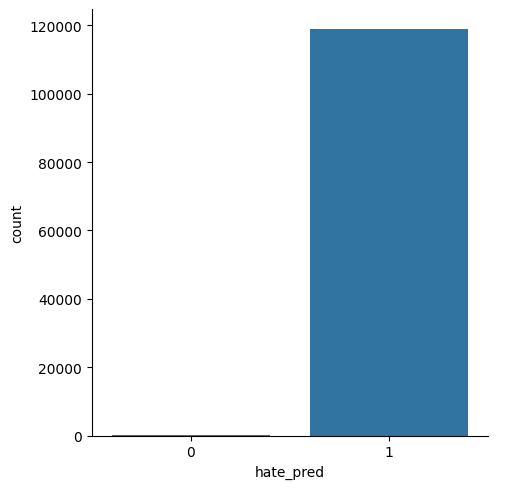

In [58]:
sns.catplot(x = 'hate_pred', data = sentiment_dataset, kind = 'count')

In [59]:
hateful_dataset = pd.read_csv("hateful_sentiment.csv")

In [60]:
hateful_dataset.head()

,Content,Label,Content_int
0,retweet to the rejects who constantly call my ...,1,"[146715, 1761, 7, 3, 22587, 67, 6768, 472, 129..."
1,i purpose that whatever attack everyone who ca...,1,"[146715, 80, 4226, 28, 220, 1347, 1568, 67, 65..."
2,are you fucking kidding me you deserve to fuck...,1,"[146715, 154, 26, 69, 1361, 78, 26, 6610, 7, 6..."
3,retweet i am not racist and i am not sexist i ...,1,"[146715, 1761, 80, 81, 76, 1723, 111, 80, 81, ..."
4,just imagine if the two million spent on the s...,1,"[146715, 14, 925, 204, 3, 672, 462, 5271, 9, 3..."


In [61]:
hateful_dataset = hateful_dataset[["Content", "Label"]]
hateful_dataset = hateful_dataset.rename(columns = {"Content": "text", "Label": "target"})
hateful_dataset["target"] = "3"

hateful_dataset.head()

,text,target
0,retweet to the rejects who constantly call my ...,3
1,i purpose that whatever attack everyone who ca...,3
2,are you fucking kidding me you deserve to fuck...,3
3,retweet i am not racist and i am not sexist i ...,3
4,just imagine if the two million spent on the s...,3


In [62]:
sentiment_dataset = sentiment_dataset[["text", "target"]]
sentiment_dataset.head()

,text,target
0,I'm off too bed. I gotta wake up hella early t...,0
1,I havent been able to listen to it yet My spe...,0
2,now remembers why solving a relatively big equ...,0
3,"Ate too much, feel sick",0
4,Tried to purchase a parked domain through GoDa...,0


In [63]:
sentiment_dataset.loc[sentiment_dataset['target']==4, 'target'] = 2
sentiment_dataset.loc[sentiment_dataset['target']==0, 'target'] = 1
# 1 - negative, 2 - positive, 3 - hateful


In [64]:
sentiment_dataset = pd.concat([sentiment_dataset, hateful_dataset], ignore_index= True)

In [65]:
sentiment_dataset.head()

,text,target
0,I'm off too bed. I gotta wake up hella early t...,1
1,I havent been able to listen to it yet My spe...,1
2,now remembers why solving a relatively big equ...,1
3,"Ate too much, feel sick",1
4,Tried to purchase a parked domain through GoDa...,1


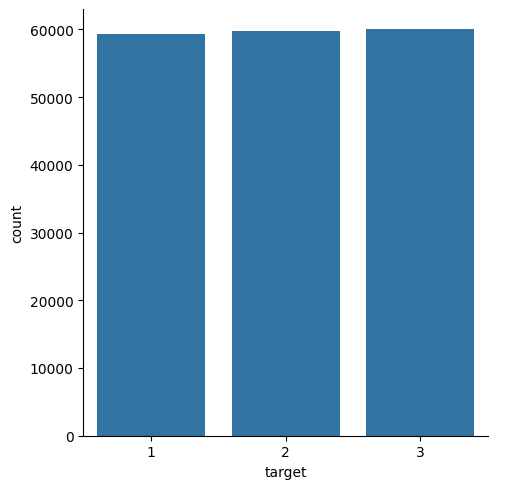

In [66]:
sns.catplot(x = 'target', data = sentiment_dataset, kind = 'count')

In [67]:
sentiment_dataset['target'].value_counts()


target
3    60000
2    59700
1    59300
Name: count, dtype: int64

In [68]:
sentiment_dataset.isnull().sum()

text      0
target    0
dtype: int64